# Spam/ham classification

In this assignment you will train a classifier to recognise spam emails. The data was taken from this [enron spam](https://www.kaggle.com/wanderfj/enron-spam)  kaggle dataset. The dataset is described [here](https://www.researchgate.net/publication/221650814_Spam_Filtering_with_Naive_Bayes_-_Which_Naive_Bayes). This will familiarize you with tools  for text analysis  from  the scikit-learn library. 

The data is provided as a zip archive "enron_spam.zip". You can unpack it with command `unzip enron_spam.zip` which will create a directory `data`. 

The data  consists of 6 batches of emails. Each batch corresponds to different person and different spam source. Each batch is stored in different subdirectory of `data` named `Enron_1` to `Enron_6`. Each email is stored in separate file :( Spam and ham emails are stored in different subdirectories. Fortunatelly the scikit-learn library provides a functiona `load_files` that can read data in this format. 

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools

You can load data from given batch using the function

In [128]:
data1 = load_files('enron_spam/data/Enron_1/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )

It returns a python dictionary. The entry 'data' contains the data from files and the entry 'target' contains the labels assigned according to the subdirectory names. The labels are integers and corresponding names can be found in the entry 'target_names'.

In [129]:
len(data1['data'])

4137

In [4]:
data1['data'][:2]

["Subject: re : cornhusker deal\r\nrita ,\r\nthings have been changing daily on this thing , so we were waiting to get it\r\nall figured out .\r\ni did tell mark mccoy to handle this , and he is going to get you all the\r\ninformation right after\r\nthe long weekend . hope this helps . pat\r\nrita wynne @ ect\r\n08 / 31 / 2000 05 : 25 pm\r\nto : pat clynes / corp / enron @ enron , daren j farmer / hou / ect @ ect\r\ncc :\r\nsubject : cornhusker deal\r\nhey guys ,\r\ni need to be bought up to speed on the cornhusker deal . i don ' t know what\r\nthe impact is to my group or what we should expect to see in terms of\r\nallocations or settlements . any info . either of you can provide would be\r\nappreciated . thanks and have a great holiday !",
 'Subject: enron / hpl actuals for sept . 18 , 2000\r\nls hpl lsk ic 2 . 500 / enron']

In [5]:
len(data1['target'])

4137

In [6]:
data1['target'][:2]

array([0, 0])

In [7]:
data1['target_names']

['ham', 'spam']

## Problems 

1. Train the multinomial bayes classifier using scikit-learn  for the first batch of data in data/Enron_1 as described in text_analysis notebook.
    1. Set asside 20% of data for testings and train the multinomial bayes classifier using the remaining 80% of data.This requires  transforming the data to feature vectors using CountVectoriser  from scikit-learn. How big is the resulting vocabulary ? 
    1. Using the test set 
        1. Draw the confusion matrix using `plot_confusion_matrix` from scikit-learn (see the latest update of the text_analysis notebook) using the test set. 
        1. Calculate recall and precision scores. 
        1. Draw the ROC curve and calculate the AUC score  using the test set. 
        1. What percentage of valid mails is classified as spam?
        1. Assuming that only mails classified as ham are put in our mailbox what percentage of mail in our inbox is spam?
        
    1. Find ten most probable and least probable words for each class.     
    1. Check the classifier on the remaining datasets data/Enron_2-6. For each set calculate recall and precision. 
    1. Combine all sets.  Train a new classifier on the combined  set, of course after dividing into test and train sets. Redo point B. using this classifier and combined test set. 
    1. Assumimg that we want to keep the frequency of misclassified ham mails belowe 5 per mile, what would be the percentage of spam in our inbox?
   

__Hint__ You can create a dataframe from the data using

In [130]:
df1 = pd.DataFrame({'text': data1['data'], 'spam': data1['target']})

X = df1['text']
y = df1['spam']

In [131]:
df1.spam.value_counts()

0    2937
1    1200
Name: spam, dtype: int64

In [132]:
df1.head(15)

,text,spam
0,"Subject: re : cornhusker deal\r\nrita ,\r\nthi...",0
1,"Subject: enron / hpl actuals for sept . 18 , 2...",0
2,Subject: fw : teco / frontera financial trades...,0
3,Subject: jan . 01 sale to texas general land o...,0
4,Subject: re : volume increase - hpl meter 68 -...,0
5,Subject: re : koch midstream services co\r\nti...,0
6,Subject: hpl meter # 981525 texoma d / p - gsu...,0
7,Subject: buy office xp for fifty bucks percent...,1
8,"Subject: hpl nom for august 15 , 2000\r\n( see...",0
9,Subject: 8 th noms\r\n- - - - - - - - - - - - ...,0


In [84]:
#check for empty data
df1.isnull().values.any()

False

In [133]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [134]:
#remove punctuation
df1["text"] = df1["text"].astype(str)
df1["text"] = df1["text"].map(lambda x: remove_punctuation(x))

In [135]:
#split and train CountVectorizer
X = df1['text']
y = df1['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [109]:
len(vectorizer.get_feature_names())

37778

In [136]:
#train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

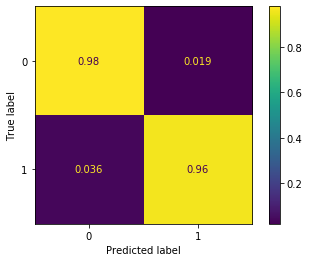

In [137]:
#plot confusion matrix
plot_confusion_matrix(model, X_test, y_test, normalize = 'true')

In [138]:
#score
y_pred = model.predict(X_test)
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model recall score: {}".format(recall_score(y_test, y_pred)))

Model precision: 0.9563492063492064
Model recall score: 0.964


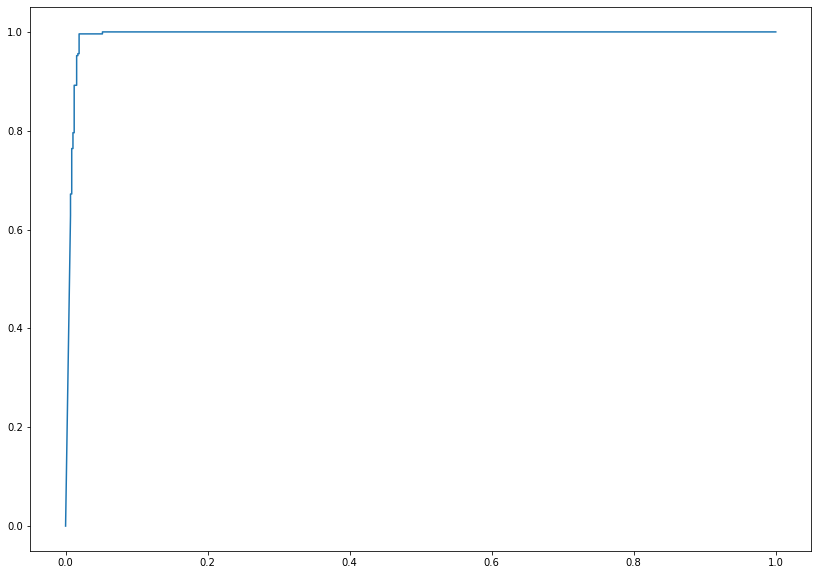

ROC AUC score = 0.972484429065744


In [139]:
#ROC curve and AUC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize = (14, 10))
plt.plot(fpr, tpr)
plt.show()

print("ROC AUC score = {}".format(roc_auc_score(y_test, y_pred)))

In [140]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, normalize = 'true').ravel()
print("{} of valid mails are classified as spam.".format(fp))
print("{} of spam go trough the spam filter.".format(fn))

0.01903114186851211 of valid mails are classified as spam.
0.036 of spam go trough the spam filter.


In [141]:
not_spam = df1.loc[df1["spam"] == 0]
spam = df1.loc[df1["spam"] == 1]
vec = CountVectorizer()

X_not_spam = not_spam["text"]
X_not_spam = vec.fit_transform(X_not_spam)

sum_not_spam_words = X_not_spam.sum(axis=0)
not_spam_word_freq = [(word, sum_not_spam_words[0, i]) for word, i in vec.vocabulary_.items()]
not_spam_top_words = sorted(not_spam_word_freq, key = lambda x: x[1], reverse = True)
not_spam_bott_words = sorted(not_spam_word_freq, key = lambda x: x[1], reverse = False)

print("Not spam most probable words:\n")
print(not_spam_top_words[:10])
print("\nNot spam least probable words:\n")
print(not_spam_bott_words[:10])


vec = CountVectorizer()
X_spam = spam["text"]
X_spam = vec.fit_transform(X_spam)

sum_spam_words = X_spam.sum(axis=0)
spam_word_freq = [(word, sum_spam_words[0, i]) for word, i in vec.vocabulary_.items()]
spam_top_words = sorted(spam_word_freq, key = lambda x: x[1], reverse = True)
spam_bott_words = sorted(spam_word_freq, key = lambda x: x[1], reverse = False)

print("\nSpam most probable words:\n")
print(spam_top_words[:10])
print("\nSpam least probable words:\n")
print(spam_bott_words[:10])

Not spam most probable words:

[('the', 14680), ('to', 12027), ('ect', 10786), ('for', 6336), ('and', 6335), ('hou', 5657), ('subject', 5090), ('enron', 4882), ('on', 4867), ('of', 4468)]

Not spam least probable words:

[('tingleaf', 1), ('fedexed', 1), ('assigning', 1), ('refence', 1), ('substaintial', 1), ('btw', 1), ('981525', 1), ('gsu', 1), ('1072', 1), ('5020', 1)]

Spam most probable words:

[('the', 5897), ('to', 4096), ('and', 3929), ('of', 3691), ('in', 2526), ('you', 2194), ('for', 2050), ('this', 1837), ('is', 1819), ('your', 1566)]

Spam least probable words:

[('titleaxis', 1), ('eureka', 1), ('titlestyletd', 1), ('tahoma', 1), ('whitetable', 1), ('lefttrtd', 1), ('bmicrosoft', 1), ('trtr', 1), ('tdbrtable', 1), ('afio', 1)]


In [70]:
#in both spam and not spam most probable words are words like 'the', 'to', 'and' which are
#pretty common in english language in general so they basically give us no information
#we should use Tfidf vectorizer to get rid of those common words

In [142]:
combined_df = df1

for i in range(2, 7):
    print("data{}".format(i))
    data = load_files('enron_spam/data/Enron_{}/'.format(i), encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )
    df = pd.DataFrame({'text': data['data'], 'spam': data['target']})
    df["text"] = df["text"].astype(str)
    df["text"] = df["text"].map(lambda x: remove_punctuation(x))

    X = df['text']
    y = df['spam']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    combined = pd.concat([combined_df, df], axis=0, ignore_index = True)
    
    print("Model precision: {}".format(precision_score(y_test, y_pred)))
    print("Model recall score: {}".format(recall_score(y_test, y_pred)))

data2
Model precision: 0.9748953974895398
Model recall score: 0.9872881355932204
data3
Model precision: 0.9880952380952381
Model recall score: 0.97265625
data4
Model precision: 0.9758713136729222
Model recall score: 0.994535519125683
data5
Model precision: 0.9929701230228472
Model recall score: 0.9982332155477032
data6
Model precision: 0.9860529986052998
Model recall score: 0.9819444444444444


In [143]:
combined_df

,text,spam
0,Subject re cornhusker deal\r\nrita \r\nthings...,0
1,Subject enron hpl actuals for sept 18 2000\...,0
2,Subject fw teco frontera financial trades\r\...,0
3,Subject jan 01 sale to texas general land off...,0
4,Subject re volume increase hpl meter 68 629...,0
...,...,...
4132,Subject calpine daily gas nomination\r\n\r\nri...,0
4133,Subject please confirm your interest \r\nmy de...,1
4134,Subject revised october avails \r\ni have been...,0
4135,Subject re tuesday december 26 th\r\ni ll b...,0


In [96]:
combined_df.isnull().values.any()

False

In [144]:
#remove punctuation
combined_df["text"] = combined_df["text"].astype(str)
combined_df["text"] = combined_df["text"].map(lambda x: remove_punctuation(x))

In [148]:
#split and train CountVectorizer
X_combined = combined_df['text']
y_combined = combined_df['spam']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size = 0.2, random_state = 14)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [149]:
#train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

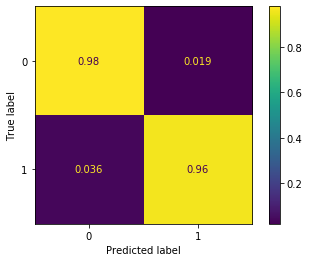

In [150]:
#plot confusion matrix
plot_confusion_matrix(model, X_test, y_test, normalize = 'true')

In [152]:
#score
y_pred = model.predict(X_test)
print("Model precision: {}".format(precision_score(y_test, y_pred)))
print("Model recall score: {}".format(recall_score(y_test, y_pred)))

Model precision: 0.9563492063492064
Model recall score: 0.964


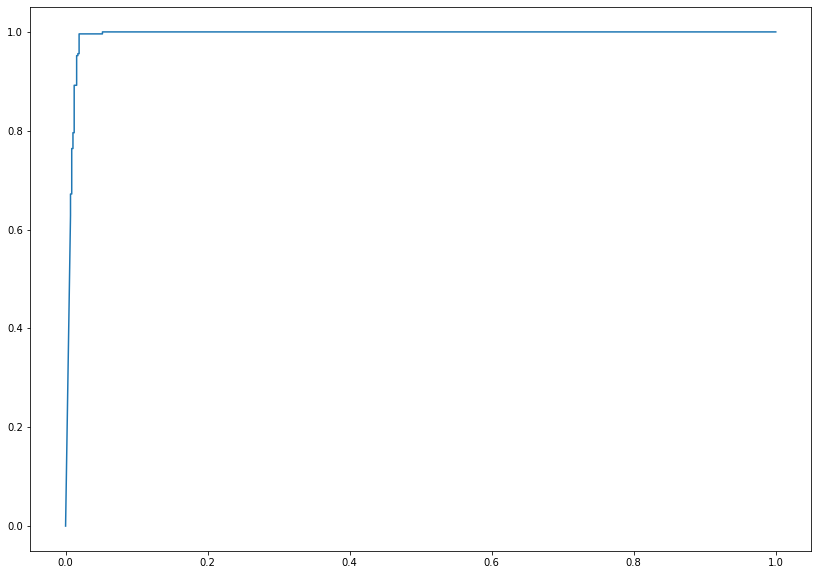

ROC AUC score = 0.972484429065744


In [154]:
#ROC curve and AUC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize = (14, 10))
plt.plot(fpr, tpr)
plt.show()

print("ROC AUC score = {}".format(roc_auc_score(y_test, y_pred)))